### Plotting utilities for Jupyter

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import time
import matplotlib.pyplot as plt
from IPython import display
def hold(circuit, state, counts, fig1, fig2, fig3):
    circuit.draw(output='mpl', fold=100, ax=fig1.gca())
    plot_state_qsphere(state, ax=fig2.gca())
    plot_histogram(counts, ax=fig3.gca())
    display.display(fig1)
    display.display(fig2)
    display.display(fig3)
    display.clear_output(wait=True)
    time.sleep(2)

### Set up Grover's

In [3]:
import numpy as np
from qiskit.circuit.library import Diagonal
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, DensityMatrix, ScalarOp
from qiskit.visualization import plot_state_qsphere, plot_histogram
from qiskit.converters import circuit_to_dag, dag_to_circuit

# Problem size: width and number of iterations
n = 5
steps = int(np.sqrt(2**n))

# Diagonal operators for mark and diffuse
mark_state = Statevector.from_label('01011')
diffuse_operator = 2 * DensityMatrix.from_label(n * '0') - Operator.from_label(n * 'I')
mark_circuit = Diagonal((-1)**mark_state.data)  # circuit that induces a -1 phase on the mark_state
diffuse_circuit = Diagonal(diffuse_operator.data.diagonal())  #  circuit that reflects about average = 2|0><0| - I

In [4]:
# A single Grover's step: encode + reflect
mark_and_diffuse = QuantumCircuit(n)
all_qubits = mark_and_diffuse.qubits
mark_and_diffuse.append(mark_circuit, all_qubits, label='Mark')
mark_and_diffuse.h(all_qubits)
mark_and_diffuse.append(diffuse_circuit, all_qubits, label='Diffuse')
mark_and_diffuse.h(all_qubits)
print(mark_and_diffuse)

     ┌───────┐┌───┐┌──────────┐┌───┐
q_0: ┤0      ├┤ H ├┤0         ├┤ H ├
     │       │├───┤│          │├───┤
q_1: ┤1      ├┤ H ├┤1         ├┤ H ├
     │       │├───┤│          │├───┤
q_2: ┤2 Mark ├┤ H ├┤2 Diffuse ├┤ H ├
     │       │├───┤│          │├───┤
q_3: ┤3      ├┤ H ├┤3         ├┤ H ├
     │       │├───┤│          │├───┤
q_4: ┤4      ├┤ H ├┤4         ├┤ H ├
     └───────┘└───┘└──────────┘└───┘


### Iterate through Grover's steps, visualize circuit, state and probabilities with each step

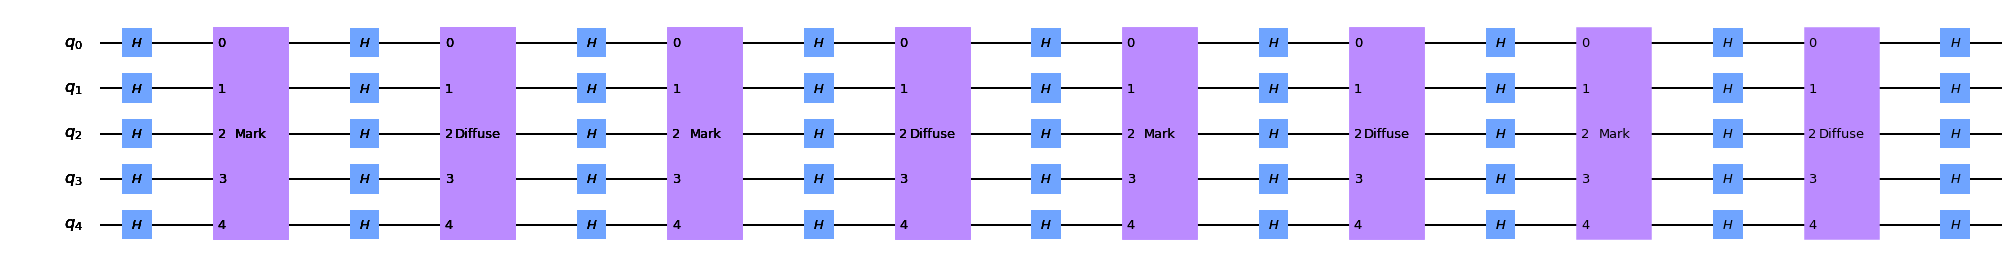

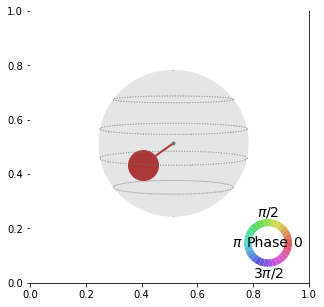

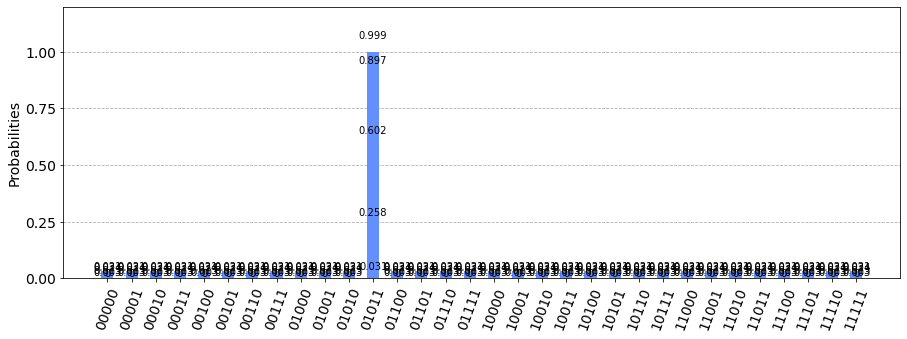

In [5]:
%matplotlib inline

# Draw and update 3 figures: circuit, state, probabilities
fig1 = plt.figure(figsize=(12,5))
fig2 = plt.figure(figsize=(5,5))
fig3 = plt.figure(figsize=(15,5))

# Build and analyze incrementally
grover_circuit = QuantumCircuit(n)
all_qubits = grover_circuit.qubits

# First layer: Prepare uniform superposition
grover_circuit.h(all_qubits)
state = Statevector.from_label('+' * len(all_qubits))

# Keep iterating to amplify the correct amplitude
for step in range(steps):
    # visualize circuit, state, probabilities
    hold(grover_circuit, state.data, state.probabilities_dict(), fig1, fig2, fig3)

    # step circuit
    grover_circuit = grover_circuit.compose(mark_and_diffuse)

    # step state
    state = state.evolve(mark_and_diffuse)